<a href="https://colab.research.google.com/github/aladino24/artificial_intelligence_orbit/blob/main/%5BStudent%5D_Revised_Object_Detection_Haar_Cascade_Hands_On.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection with Haar Cascade

Deteksi Objek menggunakan Haar feature-based cascade classifiers adalah metode deteksi objek yang diajukan pada tahun 2001 oleh Paul Viola dan Michael Jones dalam [paper](https://www.cs.cmu.edu/~efros/courses/LBMV07/Papers/viola-cvpr-01.pdf), kemudian pada tahun 2002 diteruskan oleh Rainer Lienhart dalam [paper](http://wiki.opencv.org.cn/images/5/52/MRL-TR-May02-revised-Dec02.pdf).

<br>

Haar Feature adalah fitur yang didasarkan pada Wavelet Haar. Wavelet Haar adalah gelombang tunggal bujur sangkar (satu interval tinggi dan satu interval rendah).
Untuk dua dimensi, satu terang dan satu gelap. Setiap Haar-like feature terdiri dari gabungan kotak-kotak hitam dan putih.

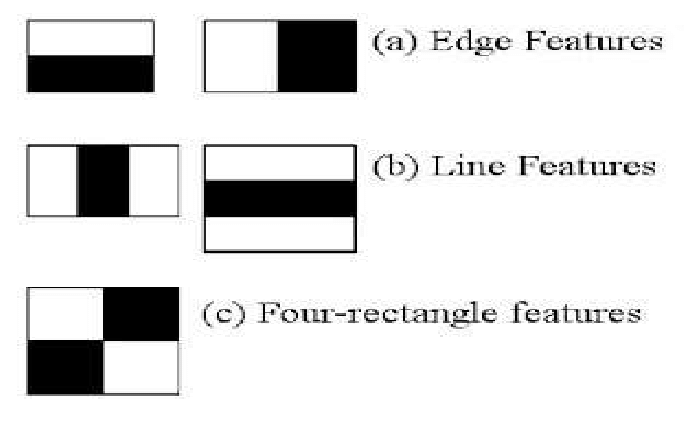

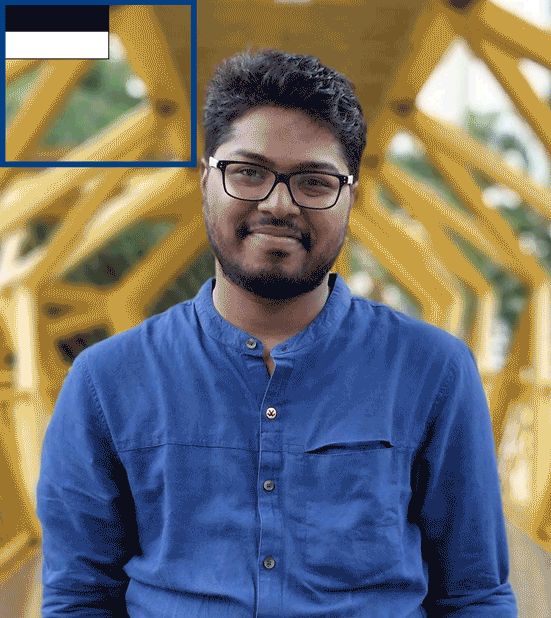

OpenCV menyediakan Cascade Classifier yang dapat diimplementasikan dengan menggunakan fungsi cv2.CascadeClassifier().

Jenis-jenis pre-trained model Cascade Classifier dapat ditemukan pada link github [berikut](https://github.com/opencv/opencv/tree/3.4/data).

Referensi tambahan :

1.   [Cascade Classifier](https://docs.opencv.org/3.4/db/d28/tutorial_cascade_classifier.html)
2.   [Cascade Classifier Training](https://docs.opencv.org/3.4/dc/d88/tutorial_traincascade.html)




##1 Menyiapkan XML Pre-trained Haarcascade
XML merupakan ekstensi file model yang terbentuk setelah training model dilakukan. Pada latihan ini, kita akan menggunakan model pre-trained yang telah disediakan oleh OpenCV

####1.1 Download pre-trained model Haar Cascade dari Google Drive

In [3]:
!gdown https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J

Downloading...
From: https://drive.google.com/uc?id=1PIX8seCgYcyR9R6vw1o88-v2QZ7YYH_J
To: /content/haarcascades.zip
100% 1.46M/1.46M [00:00<00:00, 11.1MB/s]


####1.2 Extract/Unzip file


In [6]:
!unzip '/content/haarcascades.zip' -d '/content/model'

Archive:  /content/haarcascades.zip
replace /content/model/haarcascade_eye.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

####1.3 Cek dan memastikan ketersediaan model


In [7]:
!ls /content/model

haarcascade_eye_tree_eyeglasses.xml
haarcascade_eye.xml
haarcascade_frontalcatface_extended.xml
haarcascade_frontalcatface.xml
haarcascade_frontalface_alt2.xml
haarcascade_frontalface_alt_tree.xml
haarcascade_frontalface_alt.xml
haarcascade_frontalface_default.xml
haarcascade_fullbody.xml
haarcascade_lefteye_2splits.xml
haarcascade_licence_plate_rus_16stages.xml
haarcascade_lowerbody.xml
haarcascade_profileface.xml
haarcascade_righteye_2splits.xml
haarcascade_russian_plate_number.xml
haarcascade_smile.xml
haarcascade_upperbody.xml


##2 Menyiapkan Gambar Bahan Percobaan
Sebelumnya, kita perlu men-download gambar agar dapat digunakan didalam google colaboratory.

In [8]:
!wget --no-check-certificate \
    https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg \
    -O potrait.jpg

--2023-10-02 15:42:56--  https://res.klook.com/images/fl_lossy.progressive,q_65/c_fill,w_1350,h_1080,f_auto/w_80,x_15,y_15,g_south_west,l_klook_water/activities/qupuw4hgkhwuaijbjlvp/FamilyPortraitExperiencedariZ-anddiSeoul.jpg
Resolving res.klook.com (res.klook.com)... 18.164.154.27, 18.164.154.60, 18.164.154.12, ...
Connecting to res.klook.com (res.klook.com)|18.164.154.27|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112296 (110K) [image/jpeg]
Saving to: ‘potrait.jpg’

potrait.jpg         100%[===================>] 109.66K  --.-KB/s    in 0.02s   

2023-10-02 15:42:56 (6.39 MB/s) - ‘potrait.jpg’ saved [112296/112296]



Kita akan bereksperimen dan mencoba model Haarcascade dengan gambar ini

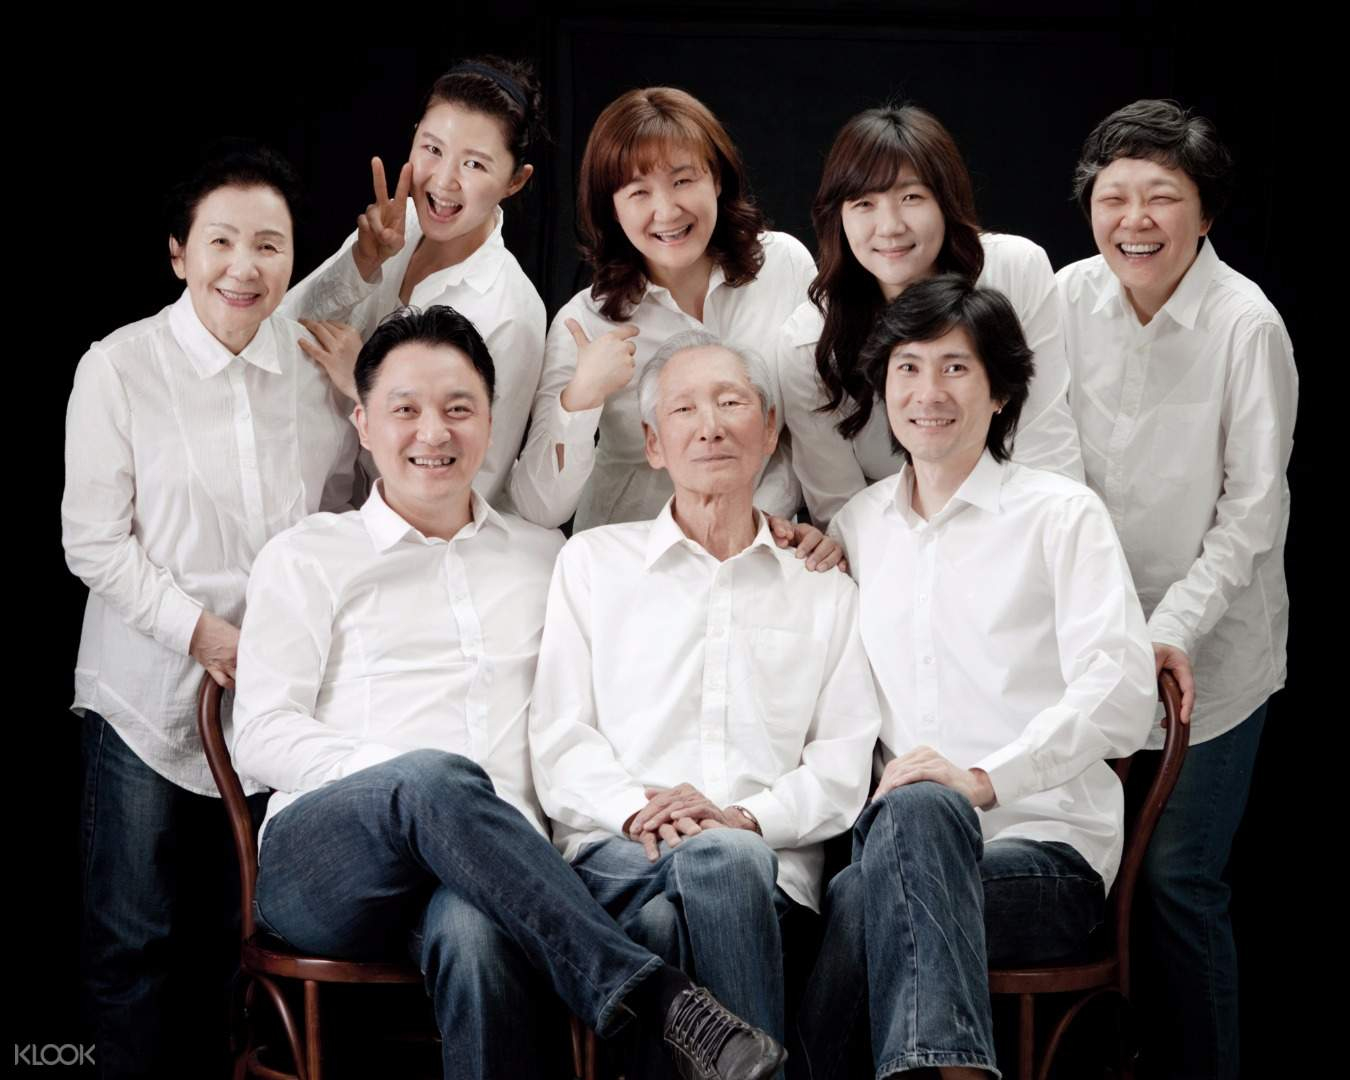

In [9]:
from IPython.display import Image
Image('potrait.jpg')

##3 Mengimpor library
Untuk menggunakan model Haarcascade, kita membutuhkan beberapa library berikut:
1.   **OpenCV** untuk image processing dan untuk load cascade classifier
3.   **Matplotlib dan pylab** untuk menampilkan gambar dan grafik


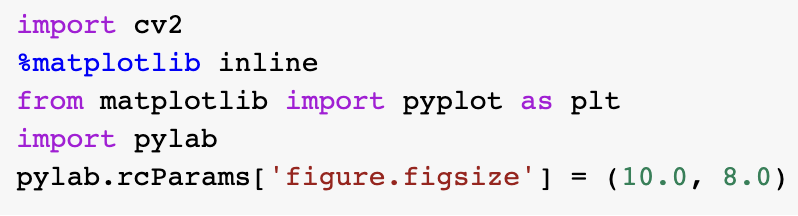

In [10]:
import cv2
%matplotlib inline
from matplotlib import pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0,8.0)

##4 Load Image
Untuk mengimplementasikan model pada gambar, sebelumnya kita perlu me-load gambar pada base opencv. Disini segala pemrosesan image dapat dilakukan menggunkan function yang disediakan opencv.

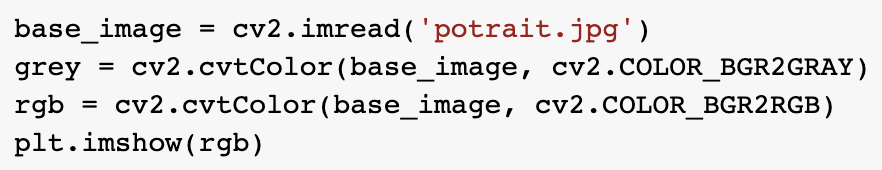

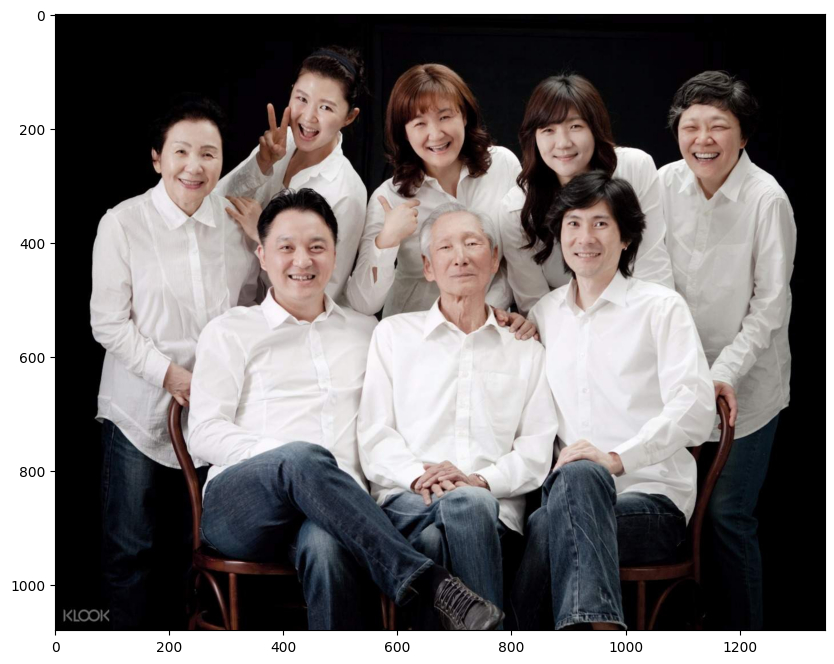

In [11]:
base_image = cv2.imread('potrait.jpg')
grey = cv2.cvtColor(base_image, cv2.COLOR_BGR2GRAY)
rgb = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

##5 Implementasi Model
Setelah menyiapkan pre-trained model file, library dan image yang akan digunakan. Maka kita dapat mulai mengimplementasikannya :)

####5.1 Face Detection
Face detection menggunakan pre-trained model haarcascade_frontalface_default.xml untuk mendeteksi wajah pada gambar

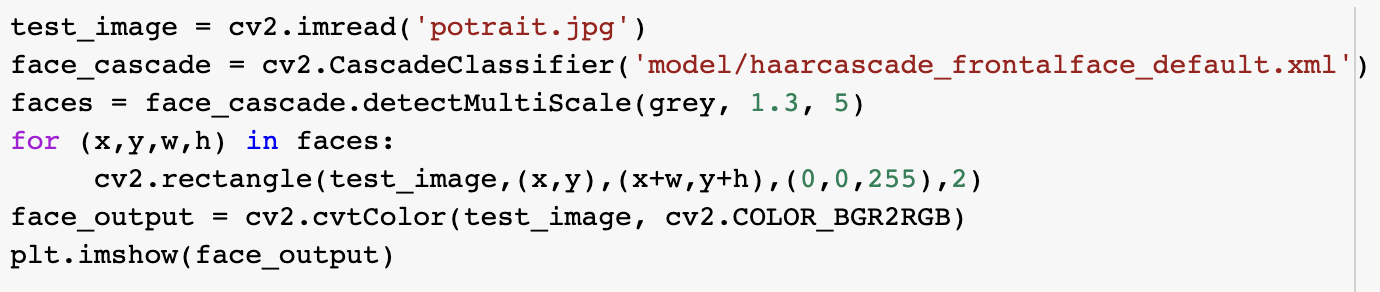

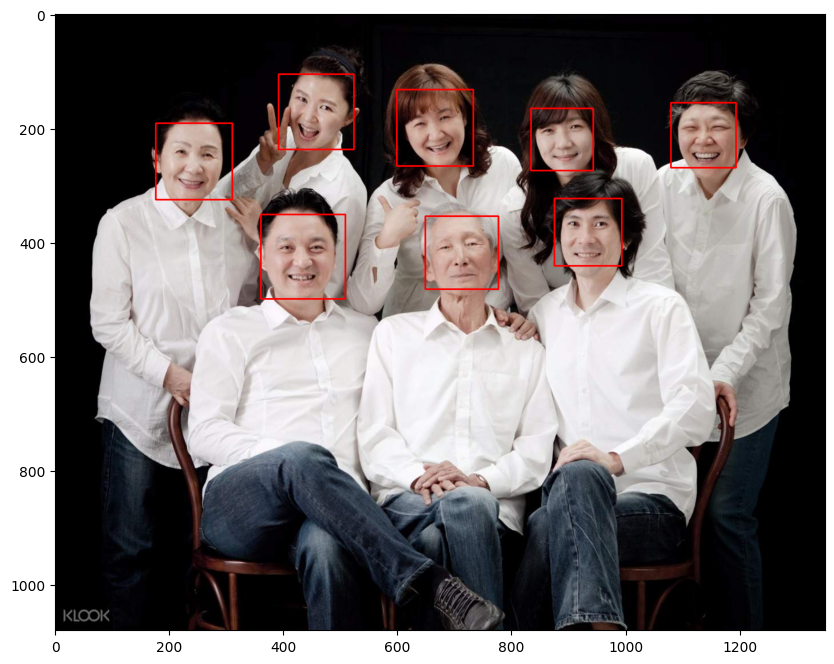

In [12]:
test_image = cv2.imread('potrait.jpg')
face_cascade = cv2.CascadeClassifier('model/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(grey, 1.3,5)
for (x,y,w,h) in faces:
    cv2.rectangle(test_image,(x,y),(x+w,y+h),(0,0,255),2)
face_output = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(face_output)

####5.2 Smile Detection
Smile detection menggunakan pre-trained model haarcascade_smile.xml untuk mendeteksi senyum pada gambar.

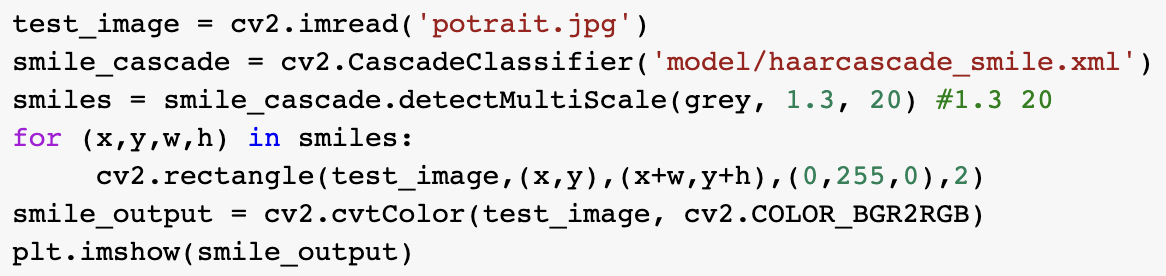

In [ ]:
#Ketikkan kode anda di cell ini

Pada gambar di atas terdapat False Positive, Untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan smile detection

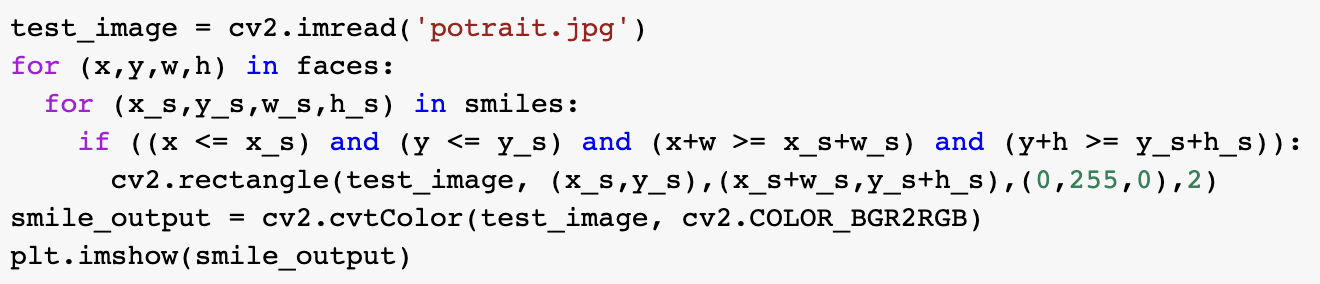

In [ ]:
#Ketikkan kode anda di cell ini


####5.3 Eye Detection
Eye Detection menggunakan pre-trained model haarcascade_eye.xml untuk mendeteksi mata pada gambar.

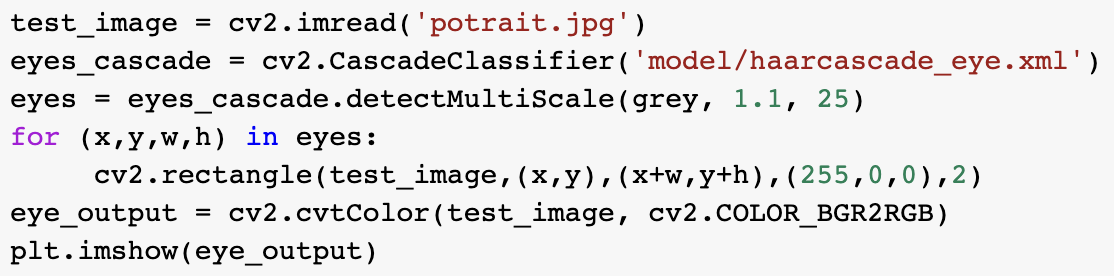

In [ ]:
#Ketikkan kode anda di cell ini


Apabila terdapat False Positive, untuk memperbaikinya deteksi dilakukan di dalam face, dengan melanjutkan kode diatas, berikut kode untuk melakukan eye detection

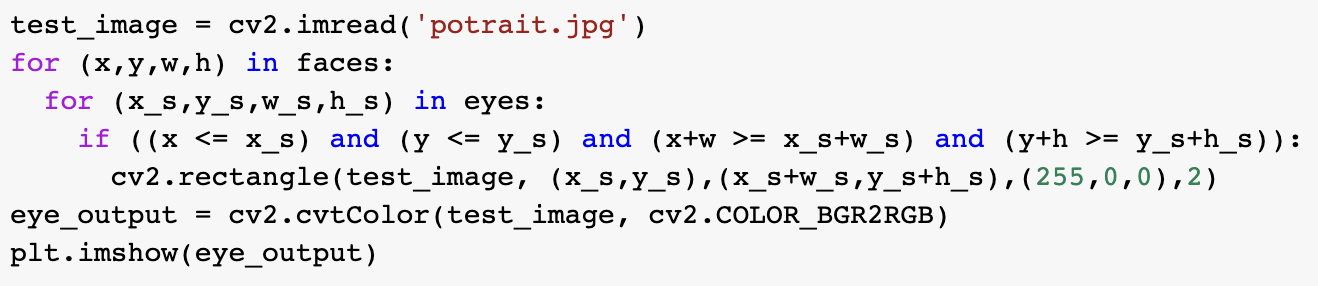

In [ ]:
#Ketikkan kode anda di cell ini


####5.4 Kombinasi Beberapa Model
Kita bisa mengkombinasikan lebih dari satu model untuk meningkatkan keakuratan pendeteksian object yang kita inginkan

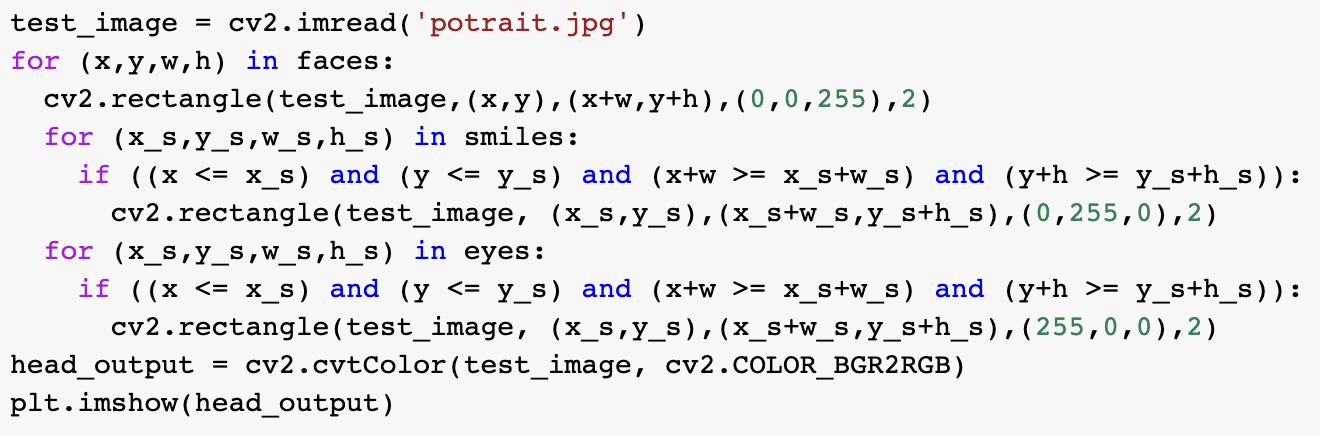

In [ ]:
#Ketikkan kode anda di cell ini


# Latihan

### No.1 : Face Detection

Download gambar dari link di bawah ini menggunakan wget.

https://web.kominfo.go.id/sites/default/files/kominfo-setkab-jokowi-Kabinet-Indonesia-Maju-1.jpg

Buatlah deteksi wajah dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi semua wajah dari gambar tersebut
<br>

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.

### No.2 : Plate Number Detection

Download gambar dari link di bawah ini menggunakan wget.

https://russiabusinesstoday.com/wp-content/uploads/2018/01/russia-cars.jpg

Buatlah deteksi plat nomor mobil dari gambar tersebut menggunakan pre-trained model Haar Cascade.

Objective : Dapat mendeteksi plat nomor dari 3 mobil terdepan

Hint : Rubah nilai scale factor dan min neighbors hingga mendapatkan hasil terbaik.